In [1]:
from PlayerScraper import PlayerScraper
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup

ps = PlayerScraper()

player_df = ps.players_df

In [ ]:
player_df[player_df['Player'] == 'LeBron James']

In [ ]:
player_url = player_df[player_df['Player'] == 'LeBron James']['Player_links'].values[0][:-5]

In [ ]:
player_url

In [ ]:
year = 2015

In [ ]:
game_log_url = f'{player_url}/gamelog/{year}'

In [ ]:
adv_game_log_url=f'{player_url}/gamelog-advanced/{year}'

In [ ]:
game_log_url

In [ ]:
ps.driver.get(player_df[player_df['Player'] == 'LeBron James']['Player_links'].values[0])

In [ ]:
ps.driver.get(game_log_url)

In [ ]:
page_html = ps.driver.page_source

In [ ]:
players_df=pd.read_csv('./Data/all_players.csv').infer_objects()

In [ ]:
players_df.to_csv('./Data/all_players.csv', index = False)

In [ ]:
players_df[players_df['Player'].str.contains("LeBron")]

In [ ]:
range(player_df[player_df['Player'] == 'LeBron James']['From']

In [ ]:
# soup = BeautifulSoup(page_html, features = 'html.parser')

# all_tbls = soup.find_all(class_ = ["row_summable sortable stats_table now_sortable",
#         "row_summable sortable stats_table now_sortable sticky_table re1 le1"])

# tables_to_scrape = dict.fromkeys([tbl.attrs['id'] for tbl in all_tbls])

# tables_to_scrape

# # html = all_tbls[5]
# html = all_tbls[0]

# columnsWsuffixs = ps.get_columns(html)

# index = ps.get_index(html)

# table_data = ps.get_table_data(html)

# test_df = pd.DataFrame(table_data)

# len(columnsWsuffixs)

# test_df.shape

# test_df = test_df.dropna(how='all')

# test_df.shape

# columnsWsuffixs

# try:
#     test_df.columns = columnsWsuffixs[1:]
# except:
#     test_df.columns = columnsWsuffixs

# test_df.index = index


# test_df

In [35]:
import time

In [5]:
player_name='LeBron James'

In [6]:
player = player_df[player_df['Player'] == player_name]
player_url = player['Player_links'].values[0][:-5]
years = list(range(player['From'].iloc[0], player['To'].iloc[0]))

game_log_urls = [f'{player_url}/gamelog/{year}' for year in years]

adv_game_log_urls = [f'{player_url}/gamelog-advanced/{year}' for year in years]

In [7]:
game_log_pg_srcs = []

for i in range(len(game_log_urls)):
    ps.driver.get(game_log_urls[i])
    time.sleep(0.5)
    game_log_pg_srcs.append(ps.driver.page_source)

In [8]:
adv_game_log_pg_srcs = []

for i in range(len(adv_game_log_urls)):
    ps.driver.get(adv_game_log_urls[i])
    time.sleep(0.5)
    adv_game_log_pg_srcs.append(ps.driver.page_source)

In [9]:
game_log_tbls = []

for i in range(len(game_log_pg_srcs)):
    game_log_tbls.append(ps.Extract_All_Tables(game_log_pg_srcs[i]))

In [10]:
adv_game_log_tbls = []
for i in range(len(adv_game_log_pg_srcs)):
    adv_game_log_tbls.append(ps.Extract_All_Tables(adv_game_log_pg_srcs[i]))

In [11]:
def get_pgl_basic(logs):
    try:
        return logs['pgl_basic']
    except:
        pass

basic_game_logs = pd.concat(list(map(get_pgl_basic, game_log_tbls)))

In [23]:
game_log_tbls[1]

{}

In [12]:
def get_playoffs_basic(logs):
    try:
        return logs['pgl_basic_playoffs']
    except:
        pass

basic_playoff_game_logs = pd.concat(list(map(get_playoffs_basic, game_log_tbls)))

In [13]:
def get_adv_pgl_basic(logs):
    try:
        return logs['pgl_advanced']
    except:
        pass

adv_game_logs = pd.concat(list(map(get_adv_pgl_basic,
                                     adv_game_log_tbls)))

In [14]:
def get_adv_playoffs_basic(logs):
    try:
        return logs['pgl_advanced_playoffs']
    except:
        pass

adv_playoff_game_logs = pd.concat(list(map(get_adv_playoffs_basic,
                                             adv_game_log_tbls)))

In [15]:
bgl = pd.concat([basic_game_logs,
                 basic_playoff_game_logs]).sort_values(by = 'Date')

agl = pd.concat([adv_game_logs,
                 adv_playoff_game_logs]).sort_values(by = 'Date')

In [22]:
basic_game_logs

,G,Date,Age,Tm,,Opp,,GS,MP,FG,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
1,1,2003-10-29,18-303,CLE,@,SAC,L (-14),1,42:50,12,...,4,6,9,4,0,2,3,25,24.7,-9
2,2,2003-10-30,18-304,CLE,@,PHO,L (-9),1,40:21,8,...,10,12,8,1,0,7,1,21,14.7,-3
3,3,2003-11-01,18-306,CLE,@,POR,L (-19),1,39:10,3,...,4,4,6,2,0,2,3,8,5.0,-21
4,4,2003-11-05,18-310,CLE,,DEN,L (-4),1,41:06,3,...,9,11,7,2,3,2,1,7,11.2,-3
5,5,2003-11-07,18-312,CLE,@,IND,L (-1),1,43:44,8,...,5,5,3,0,0,7,2,23,9.0,-7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,,2019-04-02,34-093,LAL,@,OKC,L (-16),Inactive,None,None,...,None,None,None,None,None,None,None,None,None,None
79,,2019-04-04,34-095,LAL,,GSW,L (-18),Inactive,None,None,...,None,None,None,None,None,None,None,None,None,None
80,,2019-04-05,34-096,LAL,@,LAC,W (+5),Inactive,None,None,...,None,None,None,None,None,None,None,None,None,None
81,,2019-04-07,34-098,LAL,,UTA,W (+4),Inactive,None,None,...,None,None,None,None,None,None,None,None,None,None


In [20]:
set(agl['Date']).difference(set(bgl['Date']))

{'2004-11-03',
 '2004-11-04',
 '2004-11-06',
 '2004-11-09',
 '2004-11-10',
 '2004-11-13',
 '2004-11-15',
 '2004-11-18',
 '2004-11-20',
 '2004-11-21',
 '2004-11-24',
 '2004-11-26',
 '2004-11-27',
 '2004-11-29',
 '2004-12-01',
 '2004-12-02',
 '2004-12-04',
 '2004-12-07',
 '2004-12-08',
 '2004-12-11',
 '2004-12-13',
 '2004-12-15',
 '2004-12-16',
 '2004-12-18',
 '2004-12-21',
 '2004-12-22',
 '2004-12-26',
 '2004-12-28',
 '2004-12-29',
 '2005-01-03',
 '2005-01-05',
 '2005-01-08',
 '2005-01-11',
 '2005-01-13',
 '2005-01-15',
 '2005-01-16',
 '2005-01-19',
 '2005-01-20',
 '2005-01-22',
 '2005-01-24',
 '2005-01-26',
 '2005-01-28',
 '2005-01-30',
 '2005-02-01',
 '2005-02-03',
 '2005-02-05',
 '2005-02-08',
 '2005-02-11',
 '2005-02-13',
 '2005-02-16',
 '2005-02-17',
 '2005-02-23',
 '2005-02-25',
 '2005-02-27',
 '2005-02-28',
 '2005-03-02',
 '2005-03-04',
 '2005-03-06',
 '2005-03-08',
 '2005-03-13',
 '2005-03-15',
 '2005-03-16',
 '2005-03-18',
 '2005-03-20',
 '2005-03-22',
 '2005-03-24',
 '2005-03-

In [4]:
gl = pd.merge(bgl, 
             agl,
             on = 'Date',
             suffixes=('','_'),
             how = 'inner')

gl = gl.drop(columns = [col for col in gl.columns if '_' in col ])

NameError: name 'bgl' is not defined

Index(['G', 'Date', 'Age', 'Tm', ' ', 'Opp', ' ', 'GS', 'MP', 'FG', 'FGA',
       'FG%', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB',
       'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'GmSc', '+/-', 'TS%', 'eFG%',
       'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'ORtg',
       'DRtg', 'BPM'],
      dtype='object')

In [88]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
plt.plot(data = gl, x= )

In [129]:
gl_cleaned = gl.replace('Inactive', np.nan).dropna(subset = ['MP'])

In [140]:
gl_cleaned.head()

,G,Date,Age,Tm,,Opp,,GS,MP,FG,...,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,ORtg,DRtg,BPM
0,1,2003-10-29,18-303,CLE,@,SAC,L (-14),1,42:50,12,...,10.9,8.6,39.1,5.0,0.0,8.6,25.6,123,112,10.8
1,2,2003-10-30,18-304,CLE,@,PHO,L (-9),1,40:21,8,...,22.5,14.9,33.9,1.2,0.0,25.8,28.5,89,97,1.0
2,3,2003-11-01,18-306,CLE,@,POR,L (-19),1,39:10,3,...,13.3,6.6,23.6,2.7,0.0,13.4,18.2,74,112,-6.5
3,4,2003-11-05,18-310,CLE,,DEN,L (-4),1,41:06,3,...,21.1,13.1,27.8,2.5,5.1,14.9,13.7,85,95,2.0
4,5,2003-11-07,18-312,CLE,@,IND,L (-1),1,43:44,8,...,12.4,6.3,12.0,0.0,0.0,24.9,30.7,85,112,-7.3


In [138]:
gl_cleaned.columns

Index(['G', 'Date', 'Age', 'Tm', ' ', 'Opp', ' ', 'GS', 'MP', 'FG', 'FGA',
       'FG%', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB',
       'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'GmSc', '+/-', 'TS%', 'eFG%',
       'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'ORtg',
       'DRtg', 'BPM'],
      dtype='object')

In [141]:
new_cols = ['G', 'Date', 'Age', 'Tm', ' ', 'Opp', 'RES', 'GS', 'MP', 'FG', 'FGA',
       'FG%', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB',
       'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'GmSc', '+/-', 'TS%', 'eFG%',
       'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'ORtg',
       'DRtg', 'BPM']

In [142]:
gl_cleaned.columns = new_cols

In [146]:
gl_cleaned = gl_cleaned.drop(columns = ' ')

In [147]:
schema = {col:'float64' for col in gl_cleaned.columns}

In [159]:
schema['Date'] = 'datetime64'
schema['Age'] = 'string'
schema['Tm'] = 'string'
schema['Opp'] = 'string'
schema['RES'] = 'string'
schema['MP'] = 'string'

In [160]:
schema

{'G': 'float64',
 'Date': 'datetime64',
 'Age': 'string',
 'Tm': 'string',
 'Opp': 'string',
 'RES': 'string',
 'GS': 'float64',
 'MP': 'string',
 'FG': 'float64',
 'FGA': 'float64',
 'FG%': 'float64',
 '3P': 'float64',
 '3PA': 'float64',
 '3P%': 'float64',
 'FT': 'float64',
 'FTA': 'float64',
 'FT%': 'float64',
 'ORB': 'float64',
 'DRB': 'float64',
 'TRB': 'float64',
 'AST': 'float64',
 'STL': 'float64',
 'BLK': 'float64',
 'TOV': 'float64',
 'PF': 'float64',
 'PTS': 'float64',
 'GmSc': 'float64',
 '+/-': 'float64',
 'TS%': 'float64',
 'eFG%': 'float64',
 'ORB%': 'float64',
 'DRB%': 'float64',
 'TRB%': 'float64',
 'AST%': 'float64',
 'STL%': 'float64',
 'BLK%': 'float64',
 'TOV%': 'float64',
 'USG%': 'float64',
 'ORtg': 'float64',
 'DRtg': 'float64',
 'BPM': 'float64'}

In [165]:
full_game_logs = gl_cleaned.replace('', np.nan).astype(schema)

In [168]:
full_game_logs.columns

Index(['G', 'Date', 'Age', 'Tm', 'Opp', 'RES', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST',
       'STL', 'BLK', 'TOV', 'PF', 'PTS', 'GmSc', '+/-', 'TS%', 'eFG%', 'ORB%',
       'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'ORtg', 'DRtg',
       'BPM'],
      dtype='object')

<AxesSubplot:xlabel='ORtg', ylabel='PTS'>

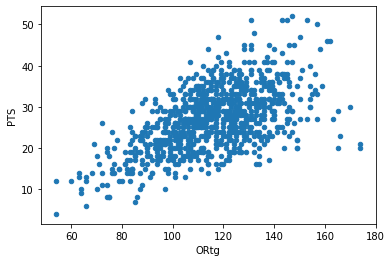

In [173]:
full_game_logs

In [5]:
ps.Extract_All_Game_logs_for_player('LeBron James')

TypeError: 'Series' object cannot be interpreted as an integer

In [1]:
from PlayerScraper import PlayerScraper
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup

ps = PlayerScraper()

player_df = ps.players_df

In [2]:
lbj_game_logs = ps.Extract_All_Game_logs_for_player('LeBron James')

<AxesSubplot:xlabel='ORtg', ylabel='PTS'>

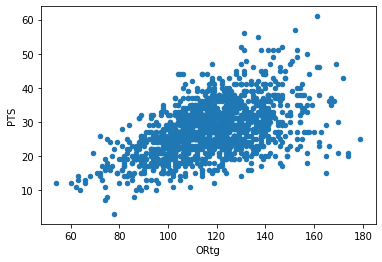

In [4]:
lbj_game_logs.plot(kind='scatter', x = 'ORtg', y = 'PTS')

In [ ]:
import seaborn

<AxesSubplot:ylabel='Frequency'>

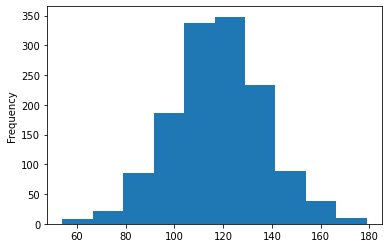

In [6]:
lbj_game_logs['ORtg'].plot(kind='hist')